<head><font align = "center" face = "courier" size = 18> T I T A N I C </font></head>
<br>
<h1>Investigating a dataset</h1>
<h2><font color="red"> With the csv provided for the Titanic data, following questions come to my mind as soon as i have a look into it.</font></h2><br>

<li> What proportion of people survived Titanic and what proportion did not? 
<li> What individual factors affected the survival chances?
<li> Which location did the passengers come from?
<li> Which class were they travelling in and how did it affect their survival chances?
<li> Who survived more? People who were alone or people who were with their family? (Siblings and Parents)

<h4> Let's start with loading the data first. We will import the csv and then load it to our dataframe.
<h4> Before doing that, we also need to import Pandas,NumPys,Matplot and Seaborn libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
##imports all necessary libraries

filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)  ##imports and loads csv file to the dataframe

titanic_df.head() ##prints header rows to view if the data has been properly loaded or not.
titanic_df.describe()

C:\Program Files\Anaconda3\envs\py27\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* <h2><font color="Red"><u>Data Wrangling</u></font></h2>

In [2]:
titanic_df.Survived.value_counts()  ##count of people who survived vs those who didn't

0    549
1    342
Name: Survived, dtype: int64

In [3]:
titanic_df.Sex.value_counts()  ##count of each sex

male      577
female    314
Name: Sex, dtype: int64

In [4]:
titanic_df.dtypes  ##To know the datatypes in this dataframe, i ran the following code.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Below code confirms the fact that Name written in the brackets is a woman's real name and the one outside the bracket is her husband's name.

In [5]:
titanic_df.loc[titanic_df['Name'].str.contains('Jacques Heath')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1,C123,S


In [6]:
# Create Survival Label Column
titanic_df['Survival'] = titanic_df.Survived.map({0 : 'Died', 1 : 'Survived'})

# Create Pclass Label Column
titanic_df['Class'] = titanic_df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

# Create Embarked Labels Column
titanic_df['Ports'] = titanic_df.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton


Now we need to find the missing values in the data if any.

In [7]:
missing_passengerid = np.where(titanic_df["PassengerId"].isnull() == True)

In [8]:
missing_passengerid

(array([], dtype=int32),)

In [9]:
missing_name = np.where(titanic_df["Name"].isnull() == True)

In [10]:
missing_name

(array([], dtype=int32),)

In [11]:
missing_age = np.where(titanic_df["Age"].isnull() == True)

In [12]:
len(missing_age[0])

177

In [13]:
titanic_df["Age"].median()

28.0

Without looking at the distribution, fixing the missing Age values with Mean/Median is not a wise decision. Let's plot the Age distribution among passengers first.

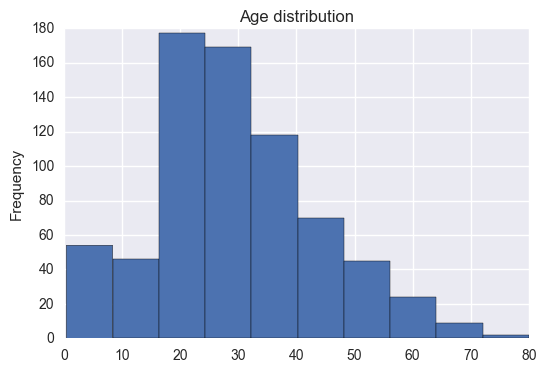

In [14]:
titanic_df["Age"].plot(kind="hist")
plt.title("Age distribution")

Since Age 20-30 is the most common age as seen in the graph so filling out the missing values with Median which is 28 isn't a bad idea. Let's fill the missing values with 28 and plot the graph again.

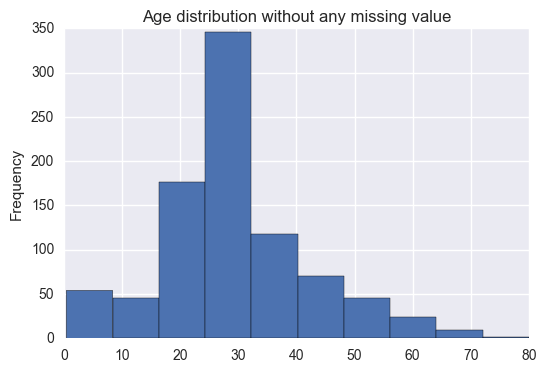

In [15]:
new_age = np.where(titanic_df["Age"].isnull(), 28, titanic_df["Age"]) ##Checks condition, if true, it fills it with 28 and if false, fills it with original value.

titanic_df["Age"] = new_age
titanic_df["Age"].plot(kind="hist")
plt.title("Age distribution without any missing value")

Clearly, as expected it leads to a steep rise in the plot at the age 28, but that is still better than ignoring 177 passengers while calculating the affect of Age on surviving probability.

In [16]:
missing_fare = np.where((titanic_df["Fare"] == 0))

In [17]:
len(missing_fare[0])

15

Fare being "0" could simply mean they were free/promotional tickets. Below code finds out missing fare values and turns out that we don't have any missing fare values.

In [18]:
missing_fare2 = np.where((titanic_df["Fare"].isnull()==True))

In [19]:
len(missing_fare2[0])

0

* <h2><font color="red">Now coming back to our questions:-
What factors are influencing Survival and studying them one by one. </font></h2>

<h2><u>First we study, <font color="blue"><b>Gender</b></font></u></h2>
<br>
We plot a bar graph to see what is the distribution of males and females on the ship and then we check the Survival comparison of males and females as shown below.

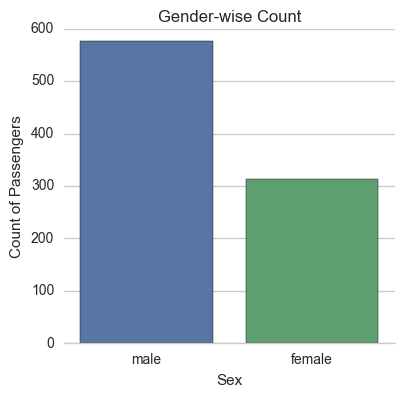

In [20]:
import seaborn as sns
sns.set(style="whitegrid")

Gender_plot = sns.factorplot('Sex', data=titanic_df, kind='count')
Gender_plot.despine(left=True)
Gender_plot.set_ylabels("Count of Passengers")
plt.title("Gender-wise Count")


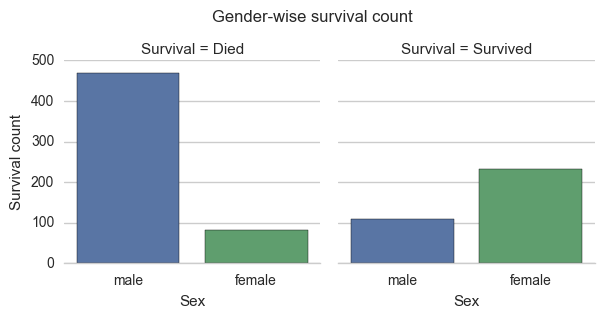

In [21]:
Gender_sur_count = sns.factorplot("Sex", col = "Survival", data=titanic_df, kind="count", size=3)
Gender_sur_count.despine(left=True)
Gender_sur_count.set_ylabels("Survival count")
x = plt.suptitle("Gender-wise survival count")
x.set_position([0.5,1.05])

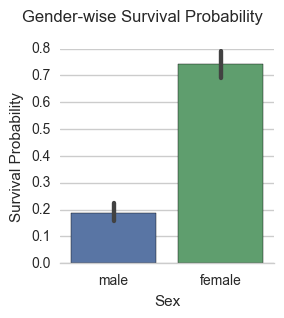

In [22]:
Gender_sur_prob = sns.factorplot("Sex", "Survived", data=titanic_df, kind="bar", size=3)
Gender_sur_prob.despine(left=True)
Gender_sur_prob.set_ylabels("Survival Probability")
x = plt.suptitle("Gender-wise Survival Probability")
x.set_position([0.5,1.05])

Hence the above data is a Clear indication that <b>Gender might have affected the survival chances</b> on the ship. This maybe connected to the fact that women and children are given preference over Men while evacuation of the ship. We'll dig deeper into this later in our process.

<h2><u>Next we study, <b><font color="blue">Class</font></b></u></h2>

We will plot graphs on:-
* Count of people travelling in each class.
* Count of people survived in each class.
* Probability of people survived in each class.
* Probability of people surviving in each class group by Gender.

In [23]:
count_classwise = titanic_df.groupby('Pclass').count()['PassengerId'] ##To calculate number of passengers that travelled in each class
count_classwise

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

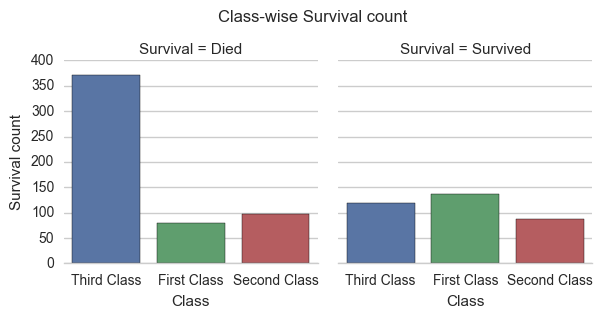

In [24]:
##Plotting graph to see the ditribution of people who survived and the ones who dies in each class.

Class_sur_count = sns.factorplot("Class", col = "Survival", data=titanic_df, kind="count", size=3)
Class_sur_count.despine(left=True)
Class_sur_count.set_ylabels("Survival count")
x = plt.suptitle("Class-wise Survival count")
x.set_position([0.5,1.05])

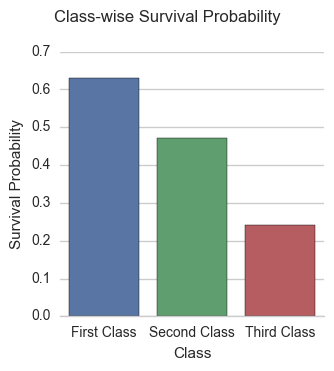

In [25]:
##This code plots a graph to depict survival probability grouped by each Class.

##Using Groupby() 2 times to apply probability function to the groupby dataframe

x=titanic_df.groupby(['Class','Survived']).agg({'Survived':'count'})
x_prob = x.groupby(level='Class').apply(lambda x: x / float(x.sum())) 
x_prob_sur=x_prob.drop(0,level="Survived") ##Dropping people who died
x_prob_sur
x_prob_sur.columns = ["Survival Rate"] ##resetting indexes of dataframe to use seaborn plotting
x_prob_sur = x_prob_sur.reset_index()

##Plotting a Seaborn graph now to see probability of survival grouped by Class
Class_sur_prob = sns.factorplot("Class","Survival Rate",data=x_prob_sur, kind="bar", size=3.5)
Class_sur_prob.despine(left=True)

Class_sur_prob.set_ylabels("Survival Probability")
x = plt.suptitle("Class-wise Survival Probability")
x.set_position([0.5,1.05])

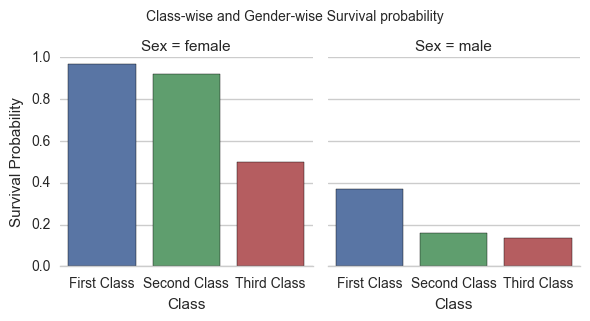

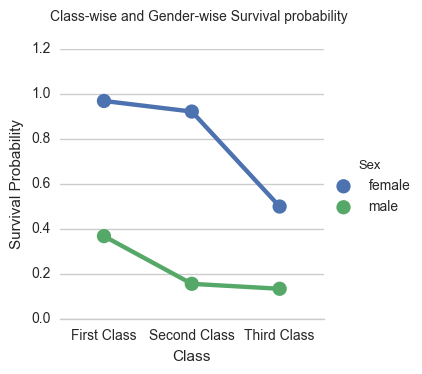

In [26]:
##This code plots a graph to depict survival probability of Females and Males grouped by each Class.

##Using Groupby() 2 times to apply probability function to the groupby dataframe

y=titanic_df.groupby(['Class','Sex','Survived']).agg({'Survived':'count'})
y_prob = y.groupby(level=['Class','Sex']).apply(lambda x:
                                  x / float(x.sum()))
y_prob
y_prob_sur=y_prob.drop(0,level="Survived") ##Dropping people who died

y_prob_sur.columns = ["Survival Rate"]
y_prob_sur = y_prob_sur.reset_index() ##resetting indexes of dataframe to use seaborn plotting
y_prob_sur

##Plotting a Seaborn bar graph now to see probability of survival grouped by Class
%matplotlib inline
Class_sur_prob_gender = sns.factorplot("Class", "Survival Rate", col = "Sex",data=y_prob_sur, kind="bar", size=3)
Class_sur_prob_gender.despine(left=True)
Class_sur_prob_gender.set_ylabels("Survival Probability")
x = plt.suptitle("Class-wise and Gender-wise Survival probability")
x.set_position([0.5,1.05])
##Plotting a Seaborn point graph now to see probability of survival grouped by Class
Class_sur_prob_gender = sns.factorplot("Class", "Survival Rate", hue = "Sex",data=y_prob_sur, kind="point", size=3.5)
Class_sur_prob_gender.despine(left=True)
Class_sur_prob_gender.set_ylabels("Survival Probability")
x = plt.suptitle("Class-wise and Gender-wise Survival probability")
x.set_position([0.5,1.05])

Now these graphs provide some very very interesting insights.
* 491/891 i.e almost 55% of the people travelling belonged to the 3rd Class.
* Since more people were travelling in the 3rd class, the count of people who died travelling in the 3rd class was way higher than other classes.
* Count of people who died was the lowest in 1st Class and those who survived was the highest in 1st Class.
* Hence, probability of people surviving in the 1st class was the highest. (0.6-0.7)
* When looked Sex wise, Probability of females surviving was the higher as already studied but it was even more if you are travelling in the 1st class. (0.95-1)
* Men travelling in 3rd class had the lowest probability of survival.
* Men travelling in 1st class and Women travelling in 3rd class had almost same probability of survival.

Hence it can be said that Females travelling in the 1st and 2nd class have the highest probability of surviving and Males travelling in 2nd and 3rd Class have the lowest.

<h2><u> Now, <font color="blue">Embarked</font></u></h2>

We will now plot another bar graph to see from which location, passengers embarked the most.
Here C, Q and S stand for Cherbourg, Queenstown and Southampton respectively.

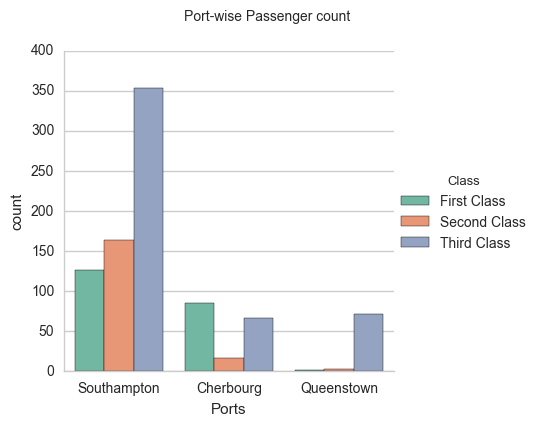

In [27]:
x = sns.color_palette("Set2")
sns.factorplot('Ports', data=titanic_df, hue='Class', kind='count', palette = x, hue_order=['First Class','Second Class','Third Class'])
x = plt.suptitle("Port-wise Passenger count")
x.set_position([0.5,1.05])

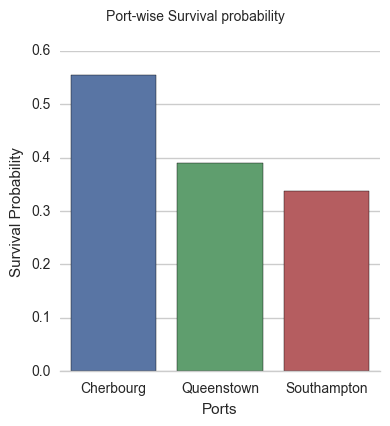

In [28]:
z=titanic_df.groupby(['Ports','Survived']).agg({'Survived':'count'})
z_prob = z.groupby(level=['Ports']).apply(lambda x:
                                  x / float(x.sum()))
z_prob
z_prob_sur=z_prob.drop(0,level="Survived") ##Dropping people who died

z_prob_sur.columns = ["Survival Rate"]
z_prob_sur = z_prob_sur.reset_index() ##resetting indexes of dataframe to use seaborn plotting
z_prob_sur

##Plotting a Seaborn bar graph now to see probability of survival grouped by Embarked location
%matplotlib inline
emb_sur_prob = sns.factorplot("Ports", "Survival Rate",data=z_prob_sur, kind="bar", size=4)
emb_sur_prob.despine(left=True)
emb_sur_prob.set_ylabels("Survival Probability")
x = plt.suptitle("Port-wise Survival probability")
x.set_position([0.5,1.05])

The graphs above shows that out of all, most passengers embarked their journey from Southampton while the least from Queenstown.
Looking at the Class wise distribution, Southampton accounts for most number of passengers belonging to the 3rd class, Queenstown had the highest 3rd Class count as well while Cherbourg showing a different pattern having most passengers belonging to the 1st class and a little less belonging to the 3rd Class.
Also looking at the probability graph, since Cherbourg was the only place where people travelling in 1st class outnumbered people travelling in 3rd class, it was expected to see that probability of survival in Cherbourg would be the highest.

<h2><u><font color = "blue">Age.</font></u></h2>

Age can obviously be seen as an important factor too when it comes to deciding survivability. Since the data had a lot of missing values for age, we had to replace it with the median earlier in the analysis.
<br>Let's look at some outliers if any and comparison with respect to Survival.

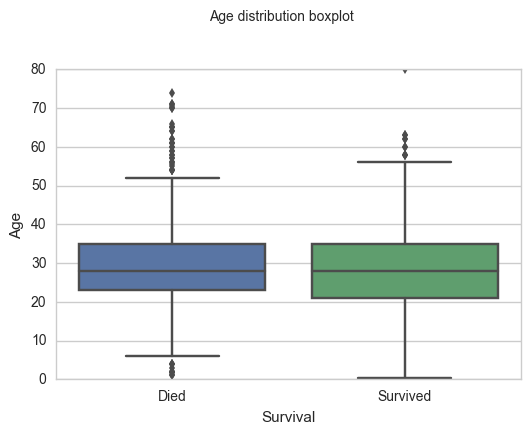

In [29]:
sns.boxplot(data=titanic_df,y="Age", x='Survival')
x = plt.suptitle("Age distribution boxplot")
x.set_position([0.5,1.05])


This gives an interesting observation. There were quite a few outliers who died belonging to Age 50-80 but only few people with age 50-80 survived. So Age may be a factor deciding probability of survival.

<h2><font color="blue">With any Family member or alone?</font></h2>

We have 2 columns, Parch and SibSp which denote whether a passenger has any "Parent/Child" or "Sibling/Spouse" respectively.
Does being alone or with any family member affected the probability to survive? Let's find out.
<br> First, we add a new column that denotes "Yes" if a person had a family member on ship and "No" if he/she was alone.

In [30]:
pd.options.mode.chained_assignment = None
titanic_df['Family'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 'Yes'
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 'No'
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton,No


Now we will plot the probability bar graph in the same way we did for Pclass and Gender.

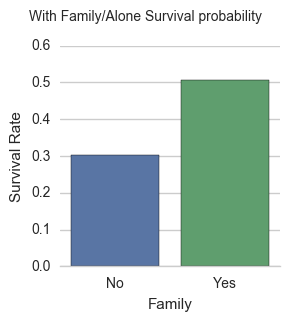

In [31]:
family=titanic_df.groupby(['Family','Survived']).agg({'Survived':'count'})
family_prob = family.groupby(level='Family').apply(lambda x: x / float(x.sum())) 
family_prob_sur=family_prob.drop(0,level="Survived") ##Dropping people who died
family_prob
family_prob_sur.columns = ["Survival Rate"] ##resetting indexes of dataframe to use seaborn plotting
family_prob_sur = family_prob_sur.reset_index()

##Plotting a Seaborn graph now to see probability of survival grouped by whether they travelled alone or not.
family_sur_probplot = sns.factorplot("Family","Survival Rate",data=family_prob_sur, kind="bar", size=3)
family_sur_probplot.despine(left=True)

Class_sur_prob.set_ylabels("Survival Probability")
x = plt.suptitle("With Family/Alone Survival probability")
x.set_position([0.5,1.05])

We observe from the above graph that people travelling with family had 50% chance of survival whereas the ones travelling alone had around 30% chance of survival.

Now that we have looked into almost every varriable that may or maynot affect the survival probability of a passenger travelling in the Titanic except a few other variables like Fare, Ticket and Cabin. Let's move to statistically prove the affect of a couple of variables on Survival which i feel are the most important and crucial.<br>
* <h2><font color="red"><u>Statistical Ananlysis</u></font></h2><br>
<br>1.) Sex
<br>2.) Pclass
<br><br><b><font color = blue>
Now the reason why we are not using z-test/t-test here is because Survived is nothing but a Categorical data represented numerically. For categorcal data, we use Chi-squared test and that is what we will use below in our analysis.</font></b>
<h3>Sex</h3>

<b><u>Dependent Variable:-</u></b> Survived<br>
<b><u>Independent Variable:-</u></b> Sex

<u><b>Null Hypotheses:-</b></u> Gender and Survival are independent on Titanic. <br>
<u><b>Alternate Hypotheses:-</b></u> Gender and Survival are dependent on Titanic.

In [32]:
from scipy.stats import chi2_contingency
# Gender to Survival
pivot = pd.pivot_table(data = titanic_df[['Survival', 'Sex']], index = 'Survival', columns = ['Sex'], aggfunc = len)
pivot

chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Results of Chi-Squared test on Class to Survival."
print "Does Class have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Results of Chi-Squared test on Class to Survival.
Does Class have a significant effect on Survival?
Chi-Squared Score = 260.717020167
Pvalue = 1.19735706278e-58


As the p-value results are significant at all alpha levels, we can easily say that we <b>Reject</b> the null hypotheses.

<h3>CLASS</h3>

<b><u>Dependent Variable:-</u></b> Survival<br>
<b><u>Independent Variable:-</u></b> Class

<u><b>Null Hypotheses:-</b></u> Class and Survival are independent. <br>
<u><b>Alternate Hypotheses:-</b></u> Class and Survival are dependent.

Now we perform a Chi-Squared test on Class.

In [33]:
from scipy.stats import chi2_contingency
# Class to Survival
pivot = pd.pivot_table(data = titanic_df[['Survival', 'Class']], index = 'Survival', columns = ['Class'], aggfunc = len)
pivot

chi2, p_value, dof, expected = chi2_contingency(pivot)
print "Results of Chi-Squared test on Class to Survival."
print "Does Class have a significant effect on Survival?"
print "Chi-Squared Score = " + str(chi2)
print "Pvalue = " + str(p_value)

Results of Chi-Squared test on Class to Survival.
Does Class have a significant effect on Survival?
Chi-Squared Score = 102.888988757
Pvalue = 4.5492517113e-23


As the p-value results are significant at all alpha levels, we can easily say that we <b>Reject</b> the null hypotheses.

* <h2><font color = "Red"><u>Conclusion of analysis done so far.</u></font></h2>

Let's recall everything we have done so far, what we initially had questions about, what observations we made and what conclusions we made after a couple of statistical tests we did.
<br>
* <h3><font color="Blue">Graphical Observations:-</font></h3><br>
* <b><u>Gender:-</u></b> We plotted graphs to see the gender count, how many survived from each Gender and what was the probability of survival for each Gender. We observed how starkly it showed the difference and that females predominantly had a significant survival rate as compared to their male counterparts.<br>
* <b><u>Class:-</u></b> To look into how Class affected the survival, we plotted graphs on count of people survived/died in each class, probability of survival in each class and how gender and class combined together might have affected the survival probability. Found some really interesting insights with this which we have been shared already.<br>
* <b><u>Embarked:-</u></b> We saw how different socioeconomic and location factors might have affected which class people chose to travel in. While most people from Southampton travelled in 3rd class, it was only Cherbourg where the count of people travelling in 1st class was higher and hence also probability of people who embarked from Cherbourg was the highest.<br>
* <b><u>Age:-</u></b> After replacing the missing values in Age with it's median, we plotted a couple of box plots to see the outliers and we found out that number of outliers in "Survived" category were less which tells us that Age did play an important factor and count of people who survived belonging to the outlier category i.e. above 50 were less. So you had a better chance of survival if you were anything below 50 years old.<br>
* <b><u>With Family or alone:-</u></b> After adding a new column to the dataframe named "Family" and plotting a bar graph based on this, it showed us that you had a better chance of survival if you were with someone from your family.<br><br>
* <h3><font color="Blue">Statistical Observations:-</font></h3><br>
We performed a Chi-squared test on 2 factors, Gender and Class and found out that both had p< 0.00001 which is significant at all Alpha confidence intervals. So it is proven statistically that a Woman/girl travelling in 1st or 2nd class had the best chances of survival on Titanic!<br><br><br>
* <h3><font color="Blue">Limitations of the dataset and other factors that might have affected the survival:-</font></h3><br>
* Was the evacuation protocol properly followed?<br>
* Were Women and children actually given priority over men?<br>
* We say cabin might also be a factore, but were people actually present in their cabin when the accident happened?<br>
* Some deaths might have happened due to stampede or because of getting buried under the debris/furniture. If that is the case, class/gender wouldn't have affected much.<br>
* The lifeboats that rescued the passengers, did they leave full or did they have more space?<br>
* The data has 177 missing age records.<br>
* How many from the crew survived?<br>
* Placement of lifeboats on the ship could also have affected the Survival. A more insight into this could have been useful.<br>
* Another factor that comes to my mind is that most of the people travelled in 3rd class so there might be a possibility that many would have been illiterate. Being illiterate means they would have faced a little difficulty in following the evacuation protocol. If that is the case, another column mentioning about their literacy would also have been useful.<br><br><br><br>
<b><font face = "Tahoma">There are more factors to look into like Cabin, Fare, Salutations(Mr./Mrs./Miss.) to look into and many other factors like lifeboat count, lifeboat placement that are missing but with what we have analysed so far in this report, i feel we have a deep insight into the data already and we know that factors like Gender and Class played a pivotal role in Survival on Titanic!</font></b>
